<a href="https://colab.research.google.com/github/Denniskag/Road-Accidents/blob/main/Road_Analysis_final_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import altair as alt

**Importing Dataset**

In [ ]:
with open('/content/drive/MyDrive/Datasets/Priscilla Data/Road accident data.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Datasets/Priscilla Data/Road accident data.csv', encoding = encoding)
df.head()

,Gender,Age,Occupation,Driving_Experience,Frequency,Traffic_Flow_Rank,Road_Characteristics_Rank,Environment_Characteristics_Rank,Vehicle_Characteristics_Rank,Human_Related_Characteristics_Rank,...,Awareness,Understanding_Of_Trend,Accidents_Seasonal,Season,Measures,Safety_Education_Rating,Engineering_Improvements_Rating,Legislative_Changes_Rating,Current_Road_Safety_Initiatives_Effectiveness,Comment
0,Female,20 - 26,Road Accident survivor/ victim,No experience,Weekly,Agree,Agree,Neutral,Strongly Agree,Strongly Agree,...,Yes,NaN,Yes,"Festive season, School re-opening season",Education and enforcement,Effective,Neutral,Effective,50% effective,No
1,Female,36 and above,Road Accident survivor/ victim,1 and above years of experience,Daily,Neutral,Agree,Agree,Strongly Agree,Neutral,...,Yes,Increasing,No,Festive season,Community sensitization,Neutral,Effective,Effective,Weak,People shd love themselves and their country. ...
2,Male,27 - 35,Road safety advocate,1 and above years of experience,Daily,Disagree,Agree,Neutral,Agree,Strongly Agree,...,Maybe,Most of road accidents are caused by motorcycl...,Maybe,Rainy season,Regulating of motorcycle riders,Ineffective,Ineffective,Neutral,The road safety initiatives are effective but ...,Regaulation of bodabodas in Kampala could help...
3,Male,36 and above,Field Traffic Police,1 and above years of experience,Daily,Agree,Neutral,Agree,Agree,Strongly Agree,...,Yes,Increasing each year,No,Festive season,Displine while driving,Effective,Effective,Effective,They not all that effective because of corrupt...,NaN
4,Male,20 - 26,student,1 and above years of experience,Daily,Neutral,Neutral,Disagree,Strongly Disagree,Strongly Disagree,...,No,NaN,Maybe,Festive season,Enforce drivers to wear safety measures like s...,Neutral,Neutral,Ineffective,Weak,No


In [ ]:
df.rename(columns={'Road_Characteristics_Rank ': 'Road_Characteristics_Rank'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Gender                                         104 non-null    object
 1   Age                                            104 non-null    object
 2   Occupation                                     104 non-null    object
 3   Driving_Experience                             104 non-null    object
 4   Frequency                                      104 non-null    object
 5   Traffic_Flow_Rank                              104 non-null    object
 6   Road_Characteristics_Rank                      104 non-null    object
 7   Environment_Characteristics_Rank               104 non-null    object
 8   Vehicle_Characteristics_Rank                   104 non-null    object
 9   Human_Related_Characteristics_Rank             104 non-null    ob

In [ ]:
# Loop through each column in the DataFrame
for col in df.columns:
    # Check if the column contains string data
    if df[col].dtype == 'object':
        # Strip leading and trailing white spaces from string values
        df[col] = df[col].str.strip()


**Visualizing Categorical  Data**

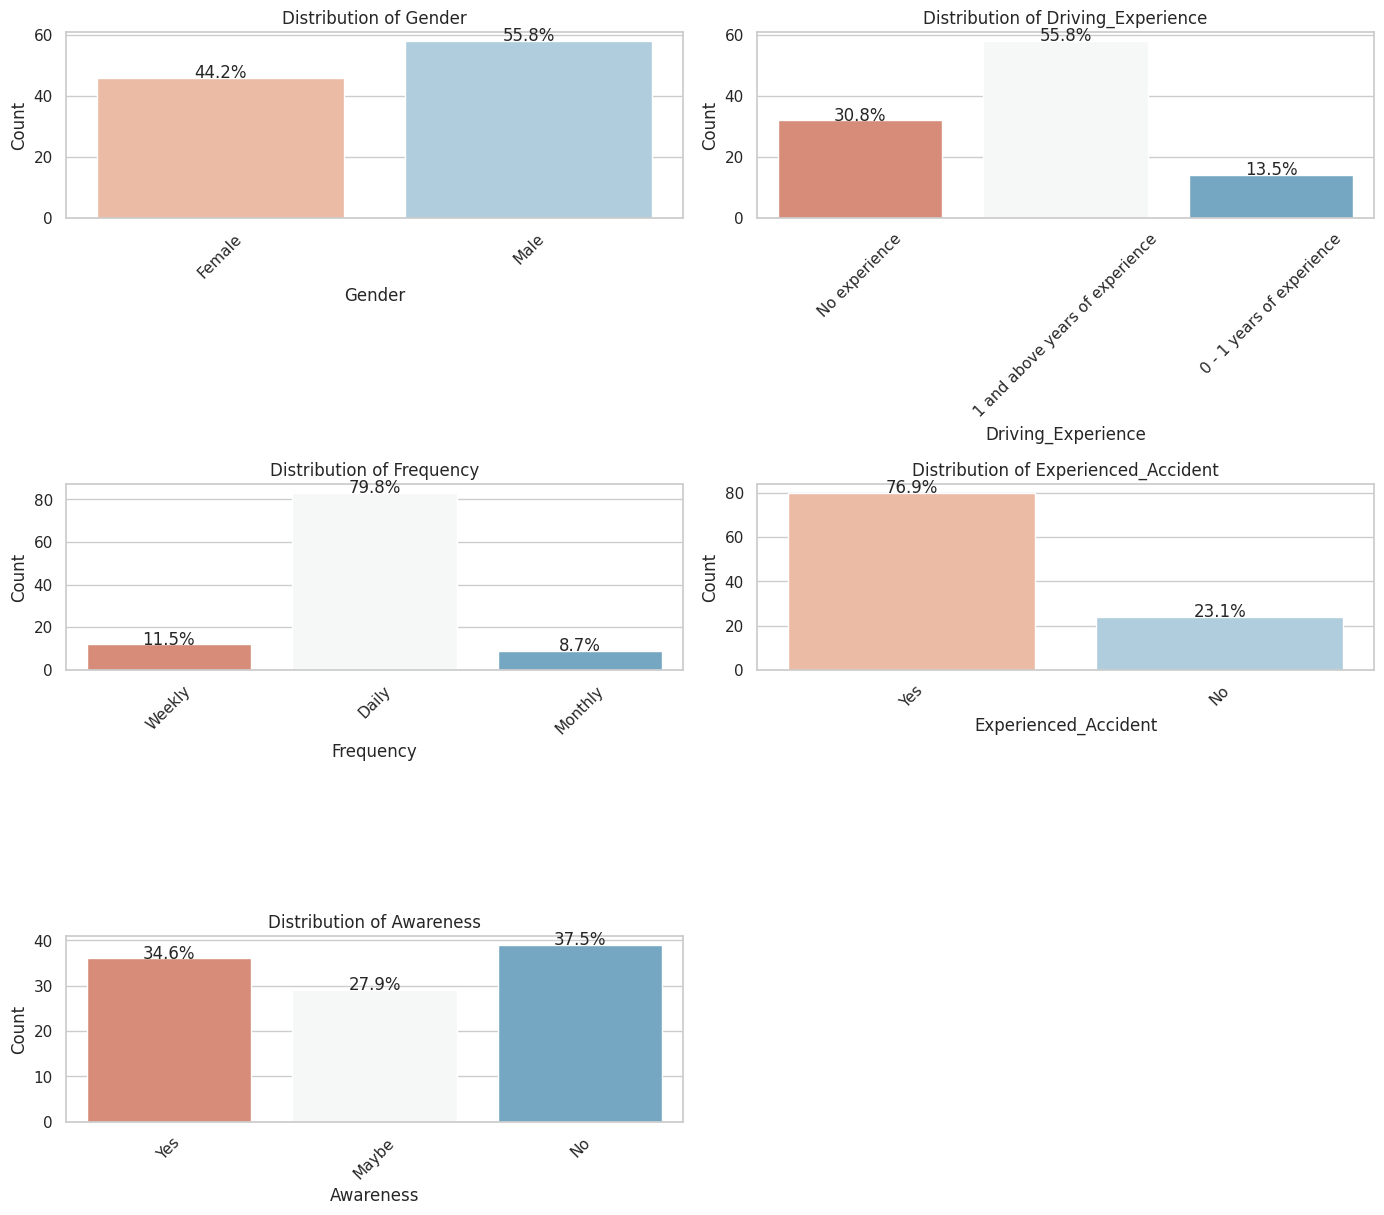

In [ ]:
# List of specified nominal variables
nominal_obj = [
    'Gender', 'Driving_Experience', 'Frequency', 'Experienced_Accident',
    'Awareness'
]

# Create count plots for each nominal variable
plt.figure(figsize=(14, 16))
for i, var in enumerate(nominal_obj, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=var, data=df, palette="RdBu")
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

# Annotate the bars with counts
for ax in plt.gcf().axes:
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
        #ax.annotate(int(p.get_height()), (x, y - 10), ha='center')

plt.tight_layout()
plt.show()


**Cross analysis Ratings Data**

In [ ]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Driving_Experience', 'Frequency',
       'Traffic_Flow_Rank', 'Road_Characteristics_Rank',
       'Environment_Characteristics_Rank', 'Vehicle_Characteristics_Rank',
       'Human_Related_Characteristics_Rank', 'Experienced_Accident', 'Cause',
       'Awareness', 'Understanding_Of_Trend', 'Accidents_Seasonal', 'Season',
       'Measures', 'Safety_Education_Rating',
       'Engineering_Improvements_Rating', 'Legislative_Changes_Rating',
       'Current_Road_Safety_Initiatives_Effectiveness', 'Comment'],
      dtype='object')

In [ ]:
df.nunique()

Gender                                             2
Age                                                4
Occupation                                        29
Driving_Experience                                 3
Frequency                                          3
Traffic_Flow_Rank                                  5
Road_Characteristics_Rank                          5
Environment_Characteristics_Rank                   5
Vehicle_Characteristics_Rank                       5
Human_Related_Characteristics_Rank                 5
Experienced_Accident                               2
Cause                                             71
Awareness                                          3
Understanding_Of_Trend                            52
Accidents_Seasonal                                 3
Season                                            19
Measures                                         101
Safety_Education_Rating                            3
Engineering_Improvements_Rating               

In [ ]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Driving_Experience', 'Frequency',
       'Traffic_Flow_Rank', 'Road_Characteristics_Rank',
       'Environment_Characteristics_Rank', 'Vehicle_Characteristics_Rank',
       'Human_Related_Characteristics_Rank', 'Experienced_Accident', 'Cause',
       'Awareness', 'Understanding_Of_Trend', 'Accidents_Seasonal', 'Season',
       'Measures', 'Safety_Education_Rating',
       'Engineering_Improvements_Rating', 'Legislative_Changes_Rating',
       'Current_Road_Safety_Initiatives_Effectiveness', 'Comment'],
      dtype='object')

In [ ]:
df['Current_Road_Safety_Initiatives_Effectiveness'].value_counts()

Weak                                                                                                                                                                                                                5
Not effective                                                                                                                                                                                                       3
Very poor                                                                                                                                                                                                           3
100% effective                                                                                                                                                                                                      2
Barely effective                                                                                                                                

In [ ]:
df['Environment_Characteristics_Rank'].value_counts()

Agree                39
Neutral              28
Strongly Agree       21
Disagree             13
Strongly Disagree     3
Name: Environment_Characteristics_Rank, dtype: int64

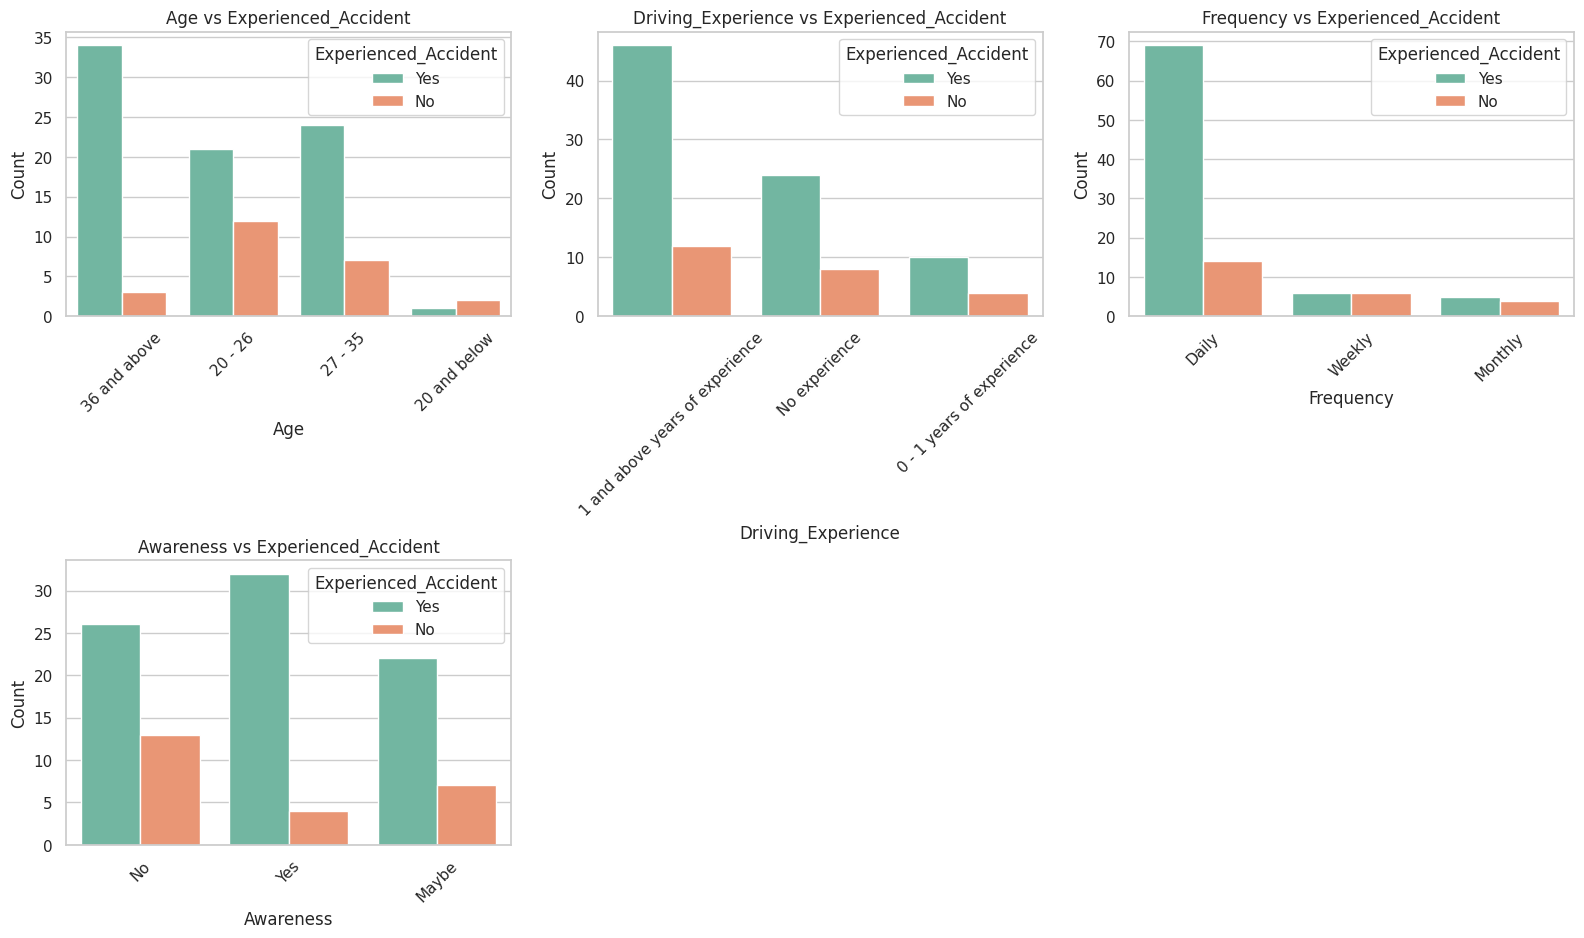

In [ ]:
# List of specified nominal variables
nominal_cat = [
    'Age', 'Driving_Experience', 'Frequency', 'Awareness'

]


# Create grouped bar plots for each ordinal variable with respect to Attrition
plt.figure(figsize=(16, 14))
for i, var in enumerate(nominal_cat, 1):
    if var == 'Experienced_Accident':
        continue  # Skip 'Attrition' in the loop

    plt.subplot(3, 3, i)
    sns.countplot(x=var, hue="Experienced_Accident", data=df, palette="Set2", order=df[var].value_counts().index)
    plt.title(f"{var} vs Experienced_Accident")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend(title='Experienced_Accident')

plt.tight_layout()
plt.show()

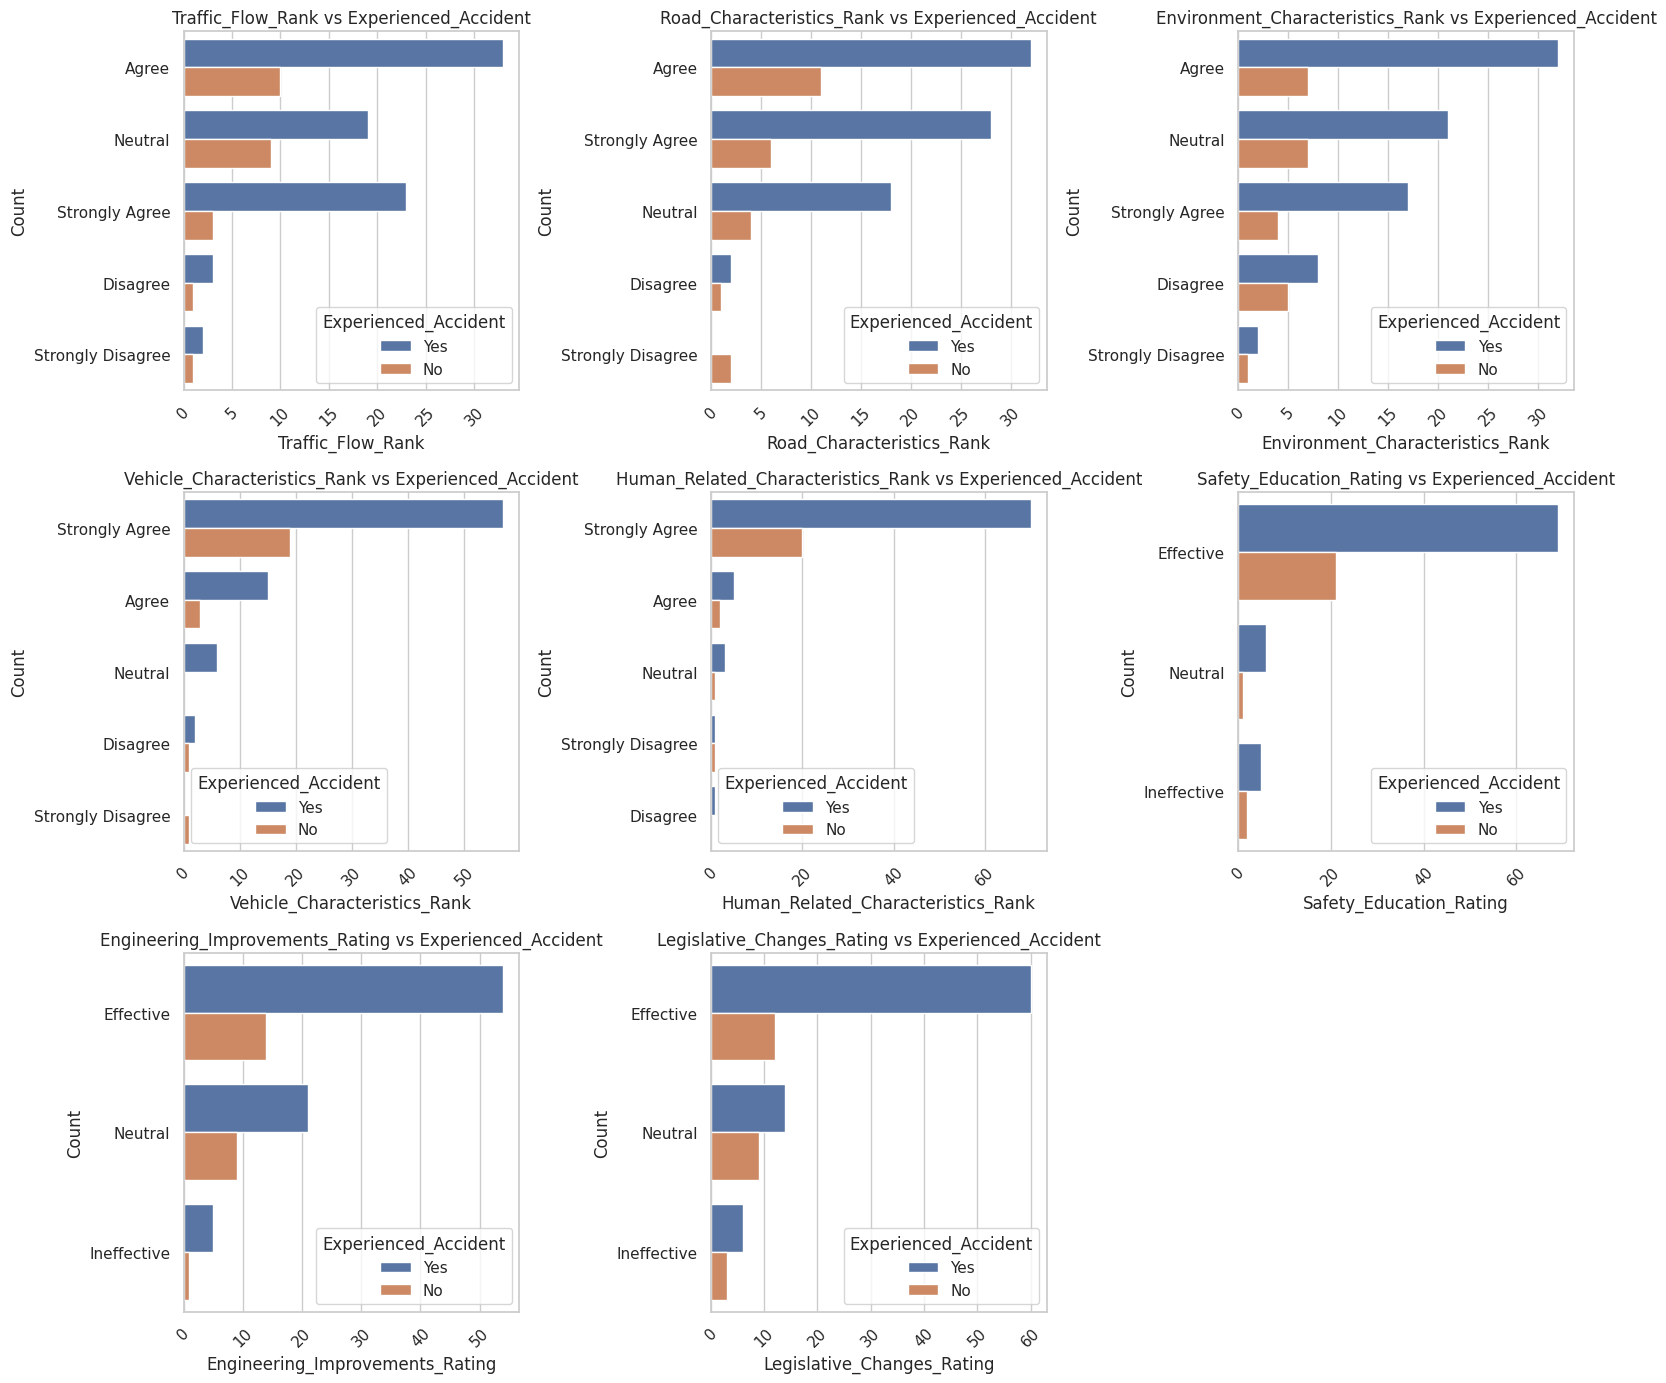

In [ ]:
# List of specified ordinal variables
ordinal_vars = [
     'Traffic_Flow_Rank','Road_Characteristics_Rank', 'Environment_Characteristics_Rank', 'Vehicle_Characteristics_Rank','Human_Related_Characteristics_Rank',
'Safety_Education_Rating','Engineering_Improvements_Rating', 'Legislative_Changes_Rating']

# Create grouped bar plots for each ordinal variable with respect to Attrition
plt.figure(figsize=(16, 14))
for i, var in enumerate(ordinal_vars, 1):
    if var == 'Experienced_Accident':
        continue  # Skip 'Attrition' in the loop

    plt.subplot(3, 3, i)
    sns.countplot(y=var, hue="Experienced_Accident", data=df,  order=df[var].value_counts().index)
    plt.title(f"{var} vs Experienced_Accident")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend(title='Experienced_Accident')

plt.tight_layout()
plt.show()

**Comments**

In [ ]:
df.dropna(subset=['Season','Comment', 'Measures', 'Cause','Understanding_Of_Trend', 'Current_Road_Safety_Initiatives_Effectiveness' ], inplace=True)

In [ ]:
x2011 = df['Comment']

In [ ]:
x2011 = x2011.astype(str)

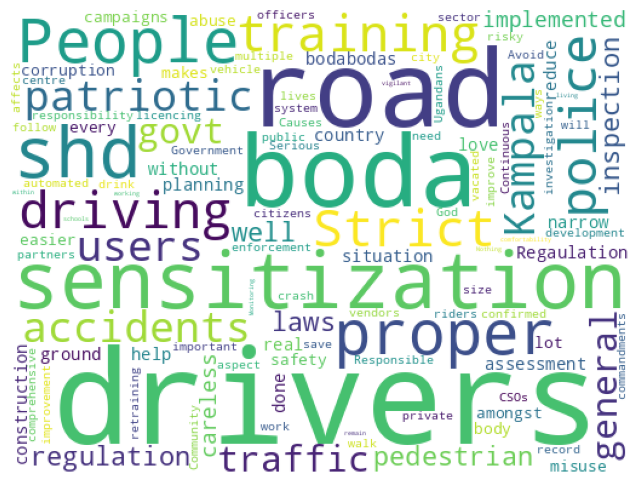

In [ ]:
plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(x2011))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

**Season**

In [ ]:
x2012 = df['Season']
x2012 = x2012.astype(str)

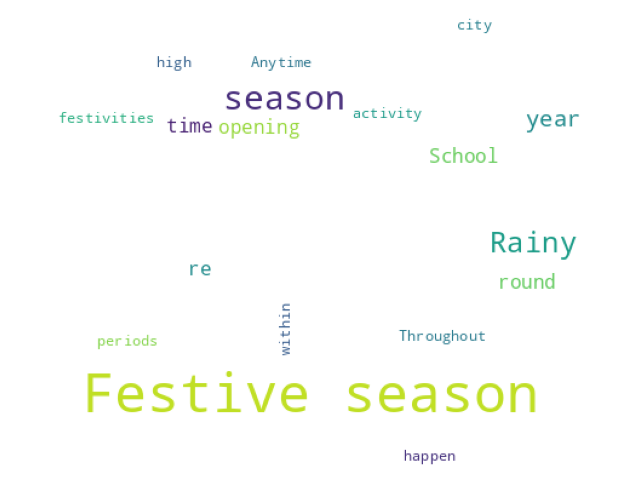

In [ ]:
plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(x2012))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

**Measures**

In [ ]:
x2013 = df['Measures']
x2013 = x2013.astype(str)

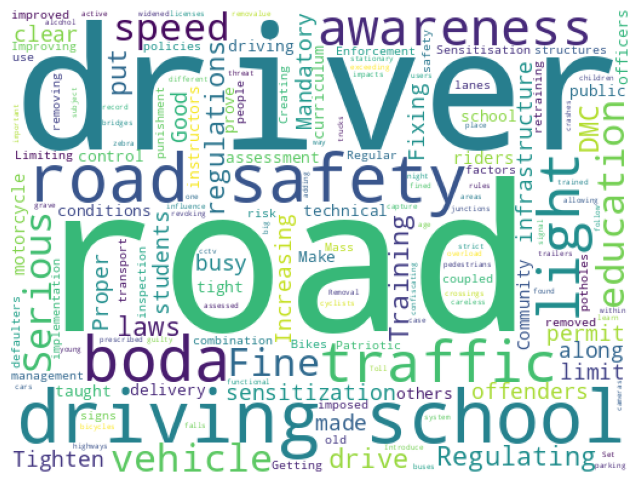

In [ ]:
plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(x2013))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

**Understanding of Trend**

In [ ]:
x2014 = df['Understanding_Of_Trend']
x2014 = x2014.astype(str)

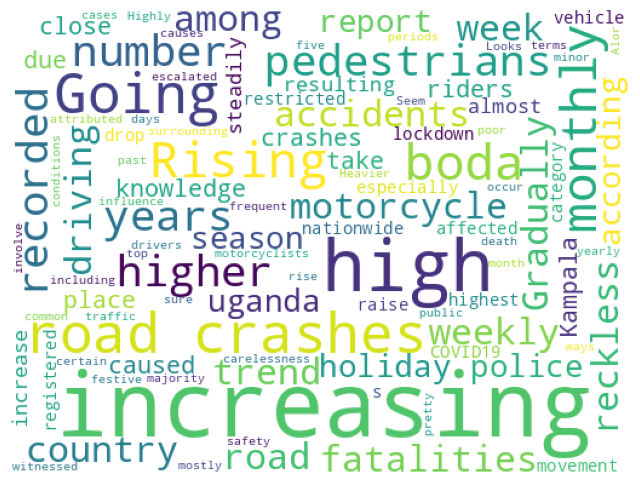

In [ ]:
plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(x2014))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

**Cause**

In [ ]:
x2015 = df['Cause']
x2015 = x2015.astype(str)

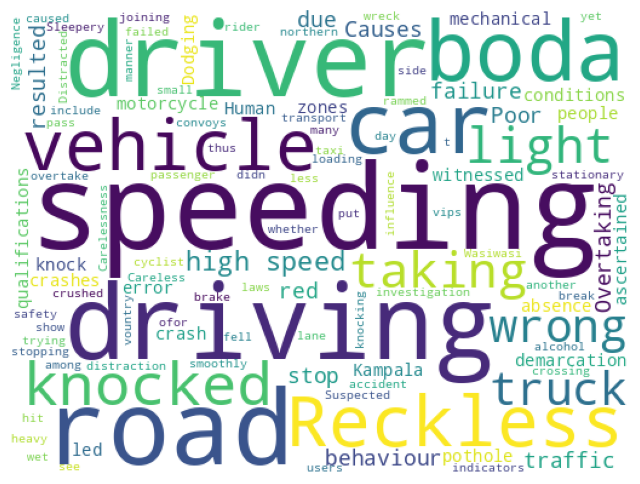

In [ ]:
plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(x2015))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

**Current_Road_Safety_Initiatives_Effectiveness**

In [ ]:
x2016 = df['Current_Road_Safety_Initiatives_Effectiveness']
x2016 = x2016.astype(str)

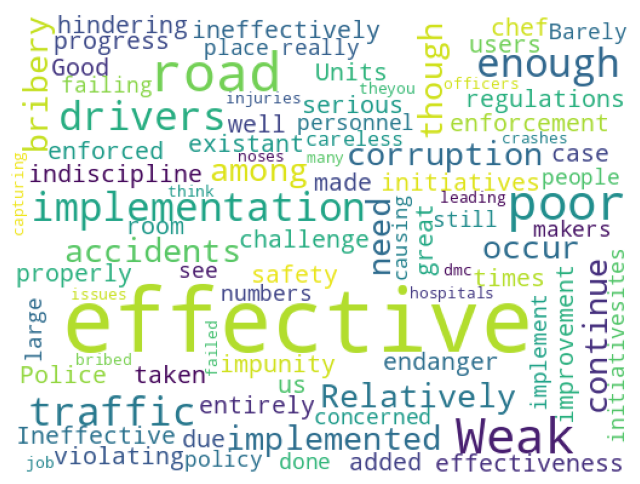

In [ ]:
plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(x2016))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()